# Multiple linear Regression

## Dataset

Marketing expenditure by channel and corresponding registered sales amount.

In [ ]:
# Begin by importing necessary libraries to start this exercise

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path #work with files within this environment
from mpl_toolkits.mplot3d import Axes3D # This will be 3D fun

In [ ]:
# Check if the file was already downloaded, if so, remove it

from pathlib import Path
my_file = Path("Advertising.csv")
if my_file.is_file():
   os.unlink("Advertising.csv")

# download the file from github

!wget https://raw.githubusercontent.com/coyoacan/Practice-in-Colab/refs/heads/main/source-files/Advertising.csv
dataset = pd.read_csv('Advertising.csv')

# Show the dataframe / NOTICE: We only have numerical data

dataset.head(10)

--2025-11-26 02:23:31--  https://raw.githubusercontent.com/coyoacan/Practice-in-Colab/refs/heads/main/source-files/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4213 (4.1K) [text/plain]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   4.11K  --.-KB/s    in 0s      

2025-11-26 02:23:31 (52.7 MB/s) - ‘Advertising.csv’ saved [4213/4213]



,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## I won't use normalization or standarization

While models like linear regression and logistic regression do not assume standardization, they may still benefit from it, particularly when features vary widely in magnitude, helping ensure balanced contributions from each feature and improving optimization. In this case features do not vary widely in magnitude and we are only using multi-linear regression.

## Preprocess

In [ ]:
# Divide dataframe into inputs and outputs

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# import train test split from SciKit Learn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Train

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# lets print the multi-linear regression equations coefficients and intercepts

print("our model's coefficients are:", regressor.coef_, "\n")
print("our model's intercept is:", "{:.4f}".format(regressor.intercept_))

our model's coefficients are: [ 0.04458402  0.19649703 -0.00278146] 

our model's intercept is: 2.9949


In [ ]:
from matplotlib import pyplot

# summarize feature importance. Basically, coefficients.
# you will notice TV and radio have the greatest impact in sales

for i,v in enumerate(regressor.coef_):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04458
Feature: 1, Score: 0.19650
Feature: 2, Score: -0.00278


In [ ]:
# The R squared is the proportion of the variance in the response variable ...
# ... that can be explained by the predictor variables in the regression model.

print("our model's prediction power equals:", "{:.4f}".format(regressor.score(X_train, y_train)))

our model's prediction power equals: 0.9067


## Predict

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
#set number of decimals to one

np.set_printoptions(precision=1)

# Compare prediction vs test side by side
# Reshape both output arrays and concatenate them in a variable

print_me = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

# print the first 10 values of the variable. Compare prediction vs test

print(print_me[:10])

[[10.1 11.3]
 [ 7.5  8.4]
 [ 7.   8.7]
 [24.1 25.4]
 [12.  11.7]
 [ 6.5  8.7]
 [12.8  7.2]
 [15.1 13.2]
 [10.8  9.2]
 [16.3 16.6]]


## Plot

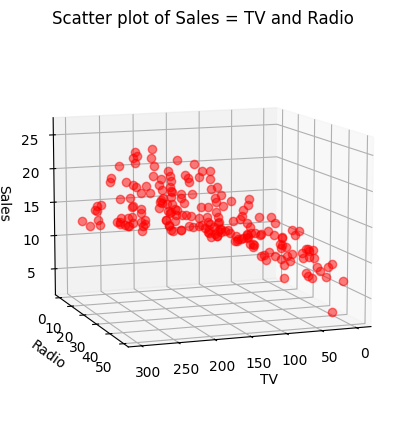

In [ ]:
# Use a 3D Plot to visualize TV, Radio and Sales

_x = X[:, 0] # TV data
_y = X[:, 1] # Radio data
_z = y       # Sales data

plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot(_x, _y, _z, color='r', linestyle='none', marker='o', alpha=0.5)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('Scatter plot of Sales = TV and Radio')

ax.view_init(
    elev=10,
    azim=70)
plt.show()

## P-Value for features

Use stats model to find statistical significance of features

In [ ]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        02:23:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0